## Name :- Pravin Nandankar
## Roll No : 58
## Machine Learning Practical 3

In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv('customer_purchase_data.csv')

In [92]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [93]:
data.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [94]:
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [95]:
data.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [96]:
data.shape

(1500, 9)

In [97]:
# Check for missing values
data.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

### Handling missing value

In [98]:
data.fillna(data.mean(), inplace=True)  # Example of filling with mean
# or
data.dropna(inplace=True)  # Dropping missing data

In [99]:
print(data.duplicated().sum())

112


In [100]:
data.drop_duplicates(inplace=True)
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [101]:
print(data.duplicated().sum())

0


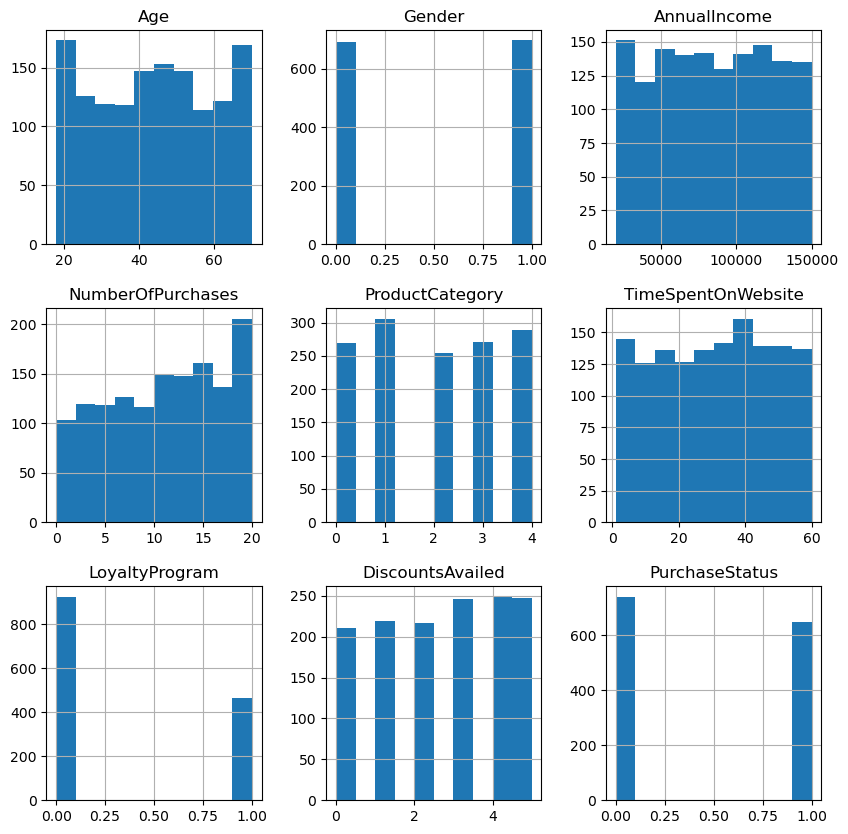

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
data.hist(figsize=(10, 10))
plt.show()

# Bar plots for categorical features
for column in data.select_dtypes(include=['object']).columns:
    sns.countplot(y=column, data=data)
    plt.show()
# The purpose of this block is to visualize the distribution of categorical features in the dataset.
# This code produces multiple histogram plots, each showing the frequency distribution of a numerical feature in the dataset.

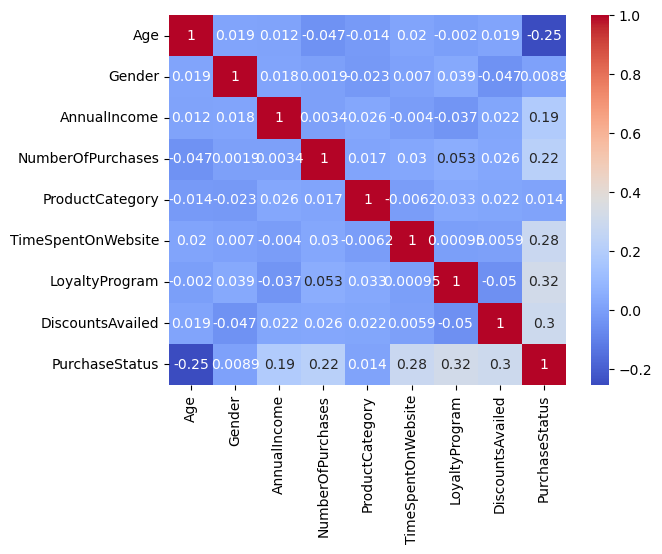

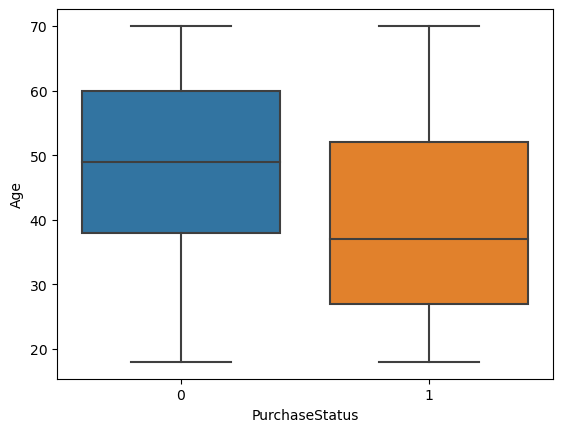

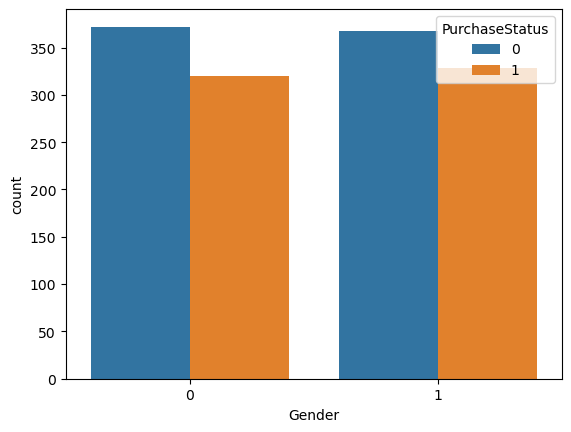

In [107]:
# Correlation matrix for numerical features
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Boxplot for numerical features vs target
sns.boxplot(x='PurchaseStatus', y='Age', data=data)  # Replace 'Age' with other numerical features
plt.show()

# Countplot for categorical features vs target
sns.countplot(x='Gender', hue='PurchaseStatus', data=data)  # Replace 'Gender' with other categorical features
plt.show()


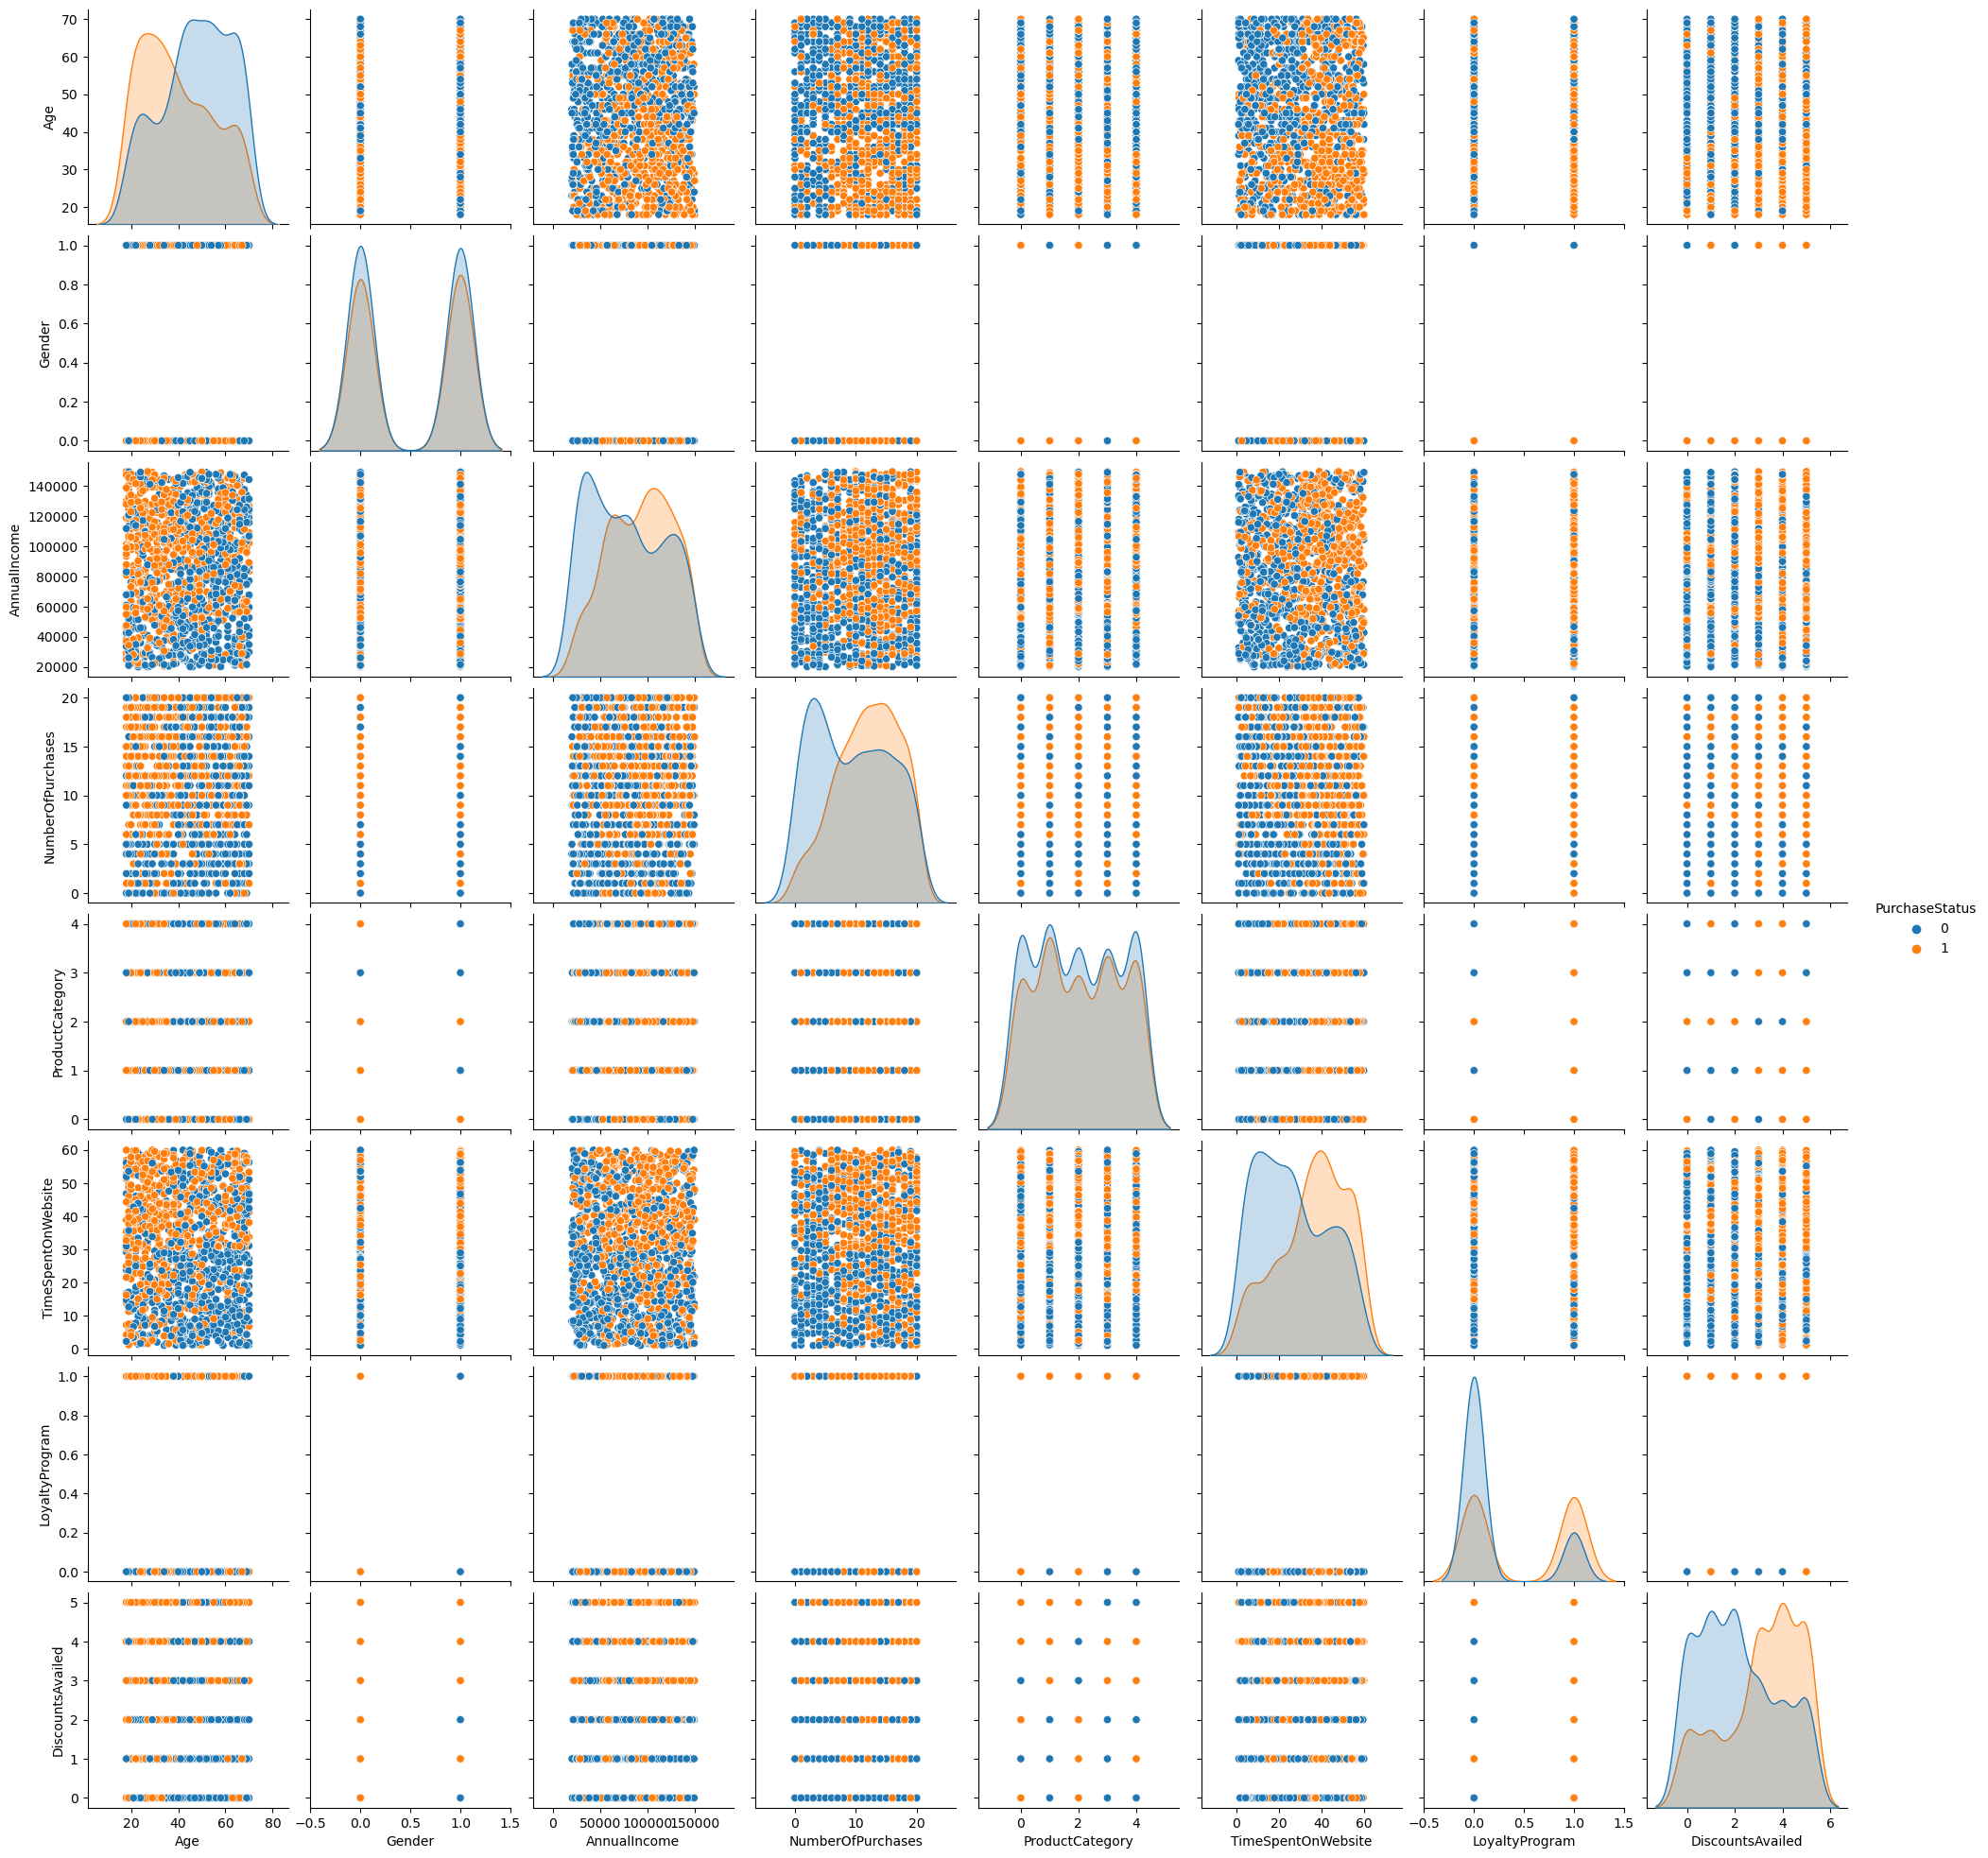

In [130]:
# # Pair plot for numerical features
sns.pairplot(data, hue='PurchaseStatus')  # Replace 'Purchased' with your target variable
plt.show()

### on hot encdoing for categorial selection

In [131]:
print(data['Age'].unique())
print(data['Gender'].unique())
print(data['PurchaseStatus'].unique())

[40 20 27 24 31 66 39 64 43 70 54 19 51 18 57 59 46 22 62 67 48 52 63 36
 37 25 53 30 68 45 50 61 47 35 32 42 33 23 55 65 26 58 29 44 34 41 38 21
 56 60 28 49 69]
[1 0]
[1 0]


In [132]:
dataframe_train_one_hot = pd.get_dummies(data, columns = ['Gender'])
dataframe_train_one_hot = pd.get_dummies(data, columns = ['Age'])
dataframe_train_one_hot

,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Age_18,Age_19,...,Age_61,Age_62,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,66120.267939,8,0,30.568601,0,5,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,23579.773583,4,2,38.240097,0,5,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,127821.306432,11,2,31.633212,1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,137798.623120,19,3,46.167059,0,4,1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,99300.964220,19,1,19.823592,0,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,65048.141834,13,0,34.590743,0,5,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1496,1,28775.331069,18,2,17.625707,0,1,1,False,False,...,False,False,False,False,False,False,True,False,False,False
1497,1,57363.247541,7,4,12.206033,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1498,0,134021.775532,16,2,37.311634,1,0,1,False,False,...,False,False,True,False,False,False,False,False,False,False


### Logistic Regression

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score


In [134]:
# Split the data into features (X) and target (y)
X = data.drop('PurchaseStatus', axis=1)
y = data['PurchaseStatus']

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [135]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
log_reg = LogisticRegression()

#The fit function is used to train a machine learning model on a given dataset
# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)


Logistic Regression Performance:
Accuracy: 0.8525179856115108
Precision: 0.84375
Recall: 0.8372093023255814
F1 Score: 0.8404669260700389


### Decision Tree Algorithm

[0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0]
Decision Tree Performance:
Accuracy: 0.8525179856115108
Precision: 0.8384615384615385
Recall: 0.8449612403100775
F1 Score: 0.8416988416988418


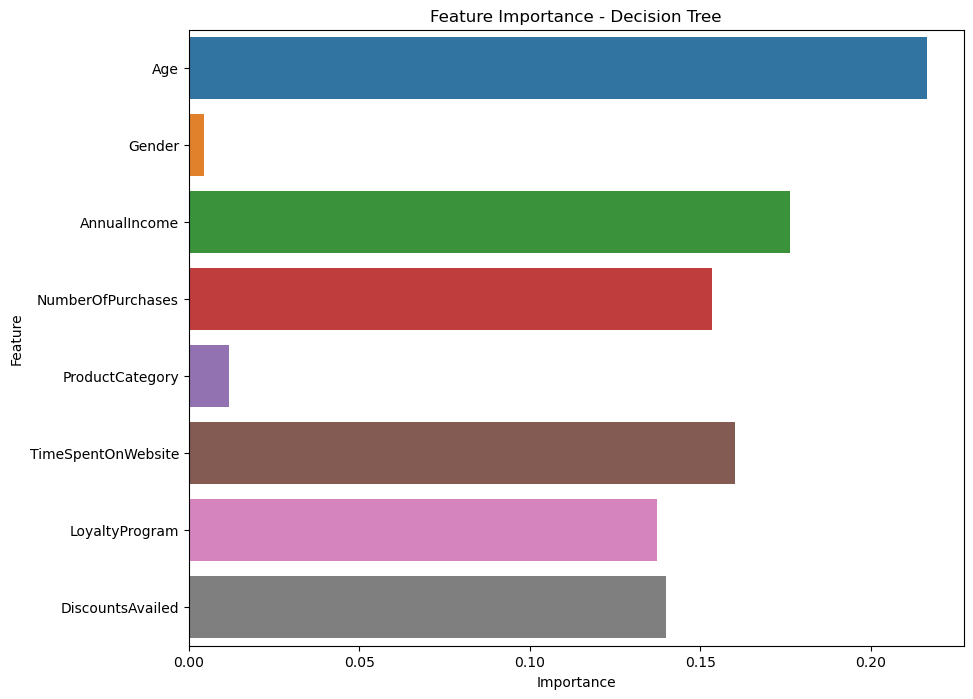

In [136]:
# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()
# max dept and minimum number of samples at leaf node and  criteria: 
# entropy and gini index are the hyperparameters for decision tree
# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Plot the feature importance
feature_importances = dt.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### KNN ALgorithm

In [137]:
# Train Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn = KNeighborsClassifier(n_neighbors=3)

In [140]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [141]:
pred = knn.predict(X_test)

In [142]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [143]:
print(confusion_matrix(y_test,pred))

[[138  74]
 [ 98 107]]


In [144]:
print(accuracy_score(y_test,pred))

0.5875299760191847


In [145]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.58      0.65      0.62       212
           1       0.59      0.52      0.55       205

    accuracy                           0.59       417
   macro avg       0.59      0.59      0.59       417
weighted avg       0.59      0.59      0.59       417



In [146]:
### chooose k Value
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy_rate.append(score)

In [147]:
accuracy_rate

[0.5539568345323741,
 0.5683453237410072,
 0.5875299760191847,
 0.5683453237410072,
 0.5875299760191847,
 0.5683453237410072,
 0.5731414868105515,
 0.5515587529976019,
 0.5611510791366906,
 0.5371702637889688,
 0.5491606714628298,
 0.5467625899280576,
 0.5587529976019184,
 0.5515587529976019,
 0.5419664268585132,
 0.5491606714628298,
 0.5635491606714629,
 0.5467625899280576,
 0.5707434052757794,
 0.5467625899280576,
 0.5539568345323741,
 0.5539568345323741,
 0.5683453237410072,
 0.5539568345323741,
 0.5635491606714629,
 0.5491606714628298,
 0.5563549160671463,
 0.5563549160671463,
 0.5707434052757794,
 0.5635491606714629,
 0.5755395683453237,
 0.5755395683453237,
 0.5731414868105515,
 0.5731414868105515,
 0.5755395683453237,
 0.5731414868105515,
 0.5851318944844125,
 0.5707434052757794,
 0.580335731414868]

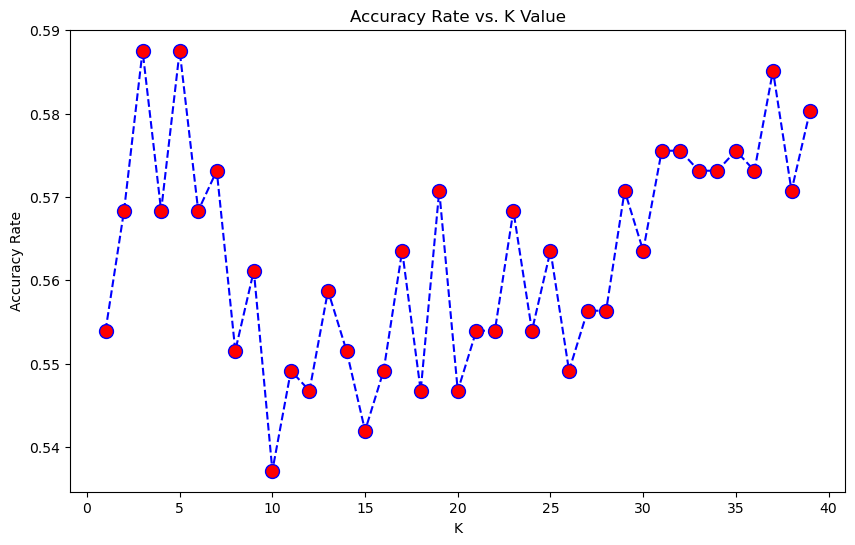

In [148]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [149]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[179  33]
 [147  58]]


0.5683453237410072


In [150]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=21


[[121  91]
 [ 95 110]]


0.5539568345323741


### Hyper Parameter Tuning

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already loaded and preprocessed your data
# X is your feature matrix and y is your target vector

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': np.arange(1, 31, 2),  # number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # distance metric
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predicting with the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'uniform'}
Accuracy on test set: 0.5755395683453237

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.59       149
           1       0.54      0.59      0.56       129

    accuracy                           0.58       278
   macro avg       0.58      0.58      0.58       278
weighted avg       0.58      0.58      0.58       278

